# Intro to Kinematics

Kinematics is a branch of classical mechanics that studies how things move without considering the forces required to produce the motion. 


- Reference frames
- Degrees of freedom
- Generalized coordinates
- Homogenous transforms

![](forward-inverse.png)

Solving inverse kinematic problem is much more challenging than the forward one.

### Degrees of freedom
The phrase "Degrees of Freedom" (DoF) refers to the minimum number of variables that are required to define the position or configuration of a mechanism in space. 2-Dof manipulator with all the parts labeled:

![](2dof-arm.png)


In [36]:
import matplotlib.pyplot as plt
import numpy as np

# A function to compute the arm configuration
# NOTE: joint1_angle is the angle counterclockwise from the link1 axis
def compute_arm_config(link1_length, link2_length, joint0_angle, joint1_angle):
    # TODO: compute the (x, y) position of the p1 joint and the end effector at p2. 
    
    joint1_x = np.cos(joint0_angle) * link1_length
    joint1_y = np.sin(joint0_angle) * link1_length
    
    p2_x = np.cos(joint1_angle + joint0_angle) * link2_length + joint1_x
    p2_y = np.sin(joint1_angle + joint0_angle) * link2_length + joint1_y
    
    return joint1_x, joint1_y, p2_x, p2_y

In [37]:
# Generate random link lengths and joint angles
# np.random.random.seed(1)
link1_length = np.random.random() * 30 + 20
link2_length = np.random.random() * 30 + 20
joint0_angle = np.random.random() * 2 * np.pi
joint1_angle = np.random.random() * 2 * np.pi

joint1_x, joint1_y, p2_x, p2_y = compute_arm_config(link1_length, link2_length, joint0_angle, joint1_angle)

print("joint0_angle = ", round(joint0_angle * 180 / np.pi, 1), " degrees")
print("joint1_angle = ", round(joint1_angle * 180 / np.pi, 1), " degrees")
print("End Effector at x = ", round(p2_x, 1), " y =", round(p2_y, 1))

joint0_angle =  52.7  degrees
joint1_angle =  348.0  degrees
End Effector at x =  48.3  y = 48.9


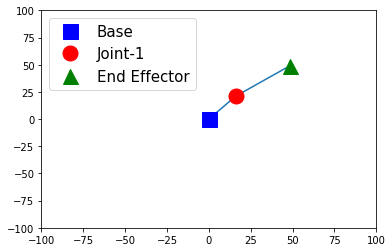

In [38]:
base_x = 0
base_y = 0

# Plot the links
plt.plot([base_x, joint1_x, p2_x], [base_y, joint1_y, p2_y])
plt.plot(base_x, base_y, 'bs', markersize=15, label='Base')
plt.plot(joint1_x, joint1_y, 'ro', markersize=15, label='Joint-1')
plt.plot(p2_x, p2_y, 'g^', markersize=15, label='End Effector')
plt.xlim(-100, 100)
plt.ylim(-100, 100)
plt.legend(fontsize=15)
plt.show()

### Generalized coordinates
The coordinates used to describe the instantaneous configuration (snapshot in time) of a system are often called *[generalized coordinates](https://en.wikipedia.org/wiki/Generalized_coordinates). This therm *generalized* often refers to the notion that for some arbitrary system these could be angles, x and y coordinates or even some other quantity that has no geometrical significance.

** DOF = number of independent generalized coordinates **

The number of independent generalized coordinates that are required to describe the configuration of a system is equal to the number of degrees of freedom. In the 2-DoF manipulator exercise we chose two particular joint angles with respect to a particular reference frame, but we could have just as easily chosen other angles with respect to some other reference frame. The number of possible choices for the generalized coordinates that describe a system is, in fact, infinite, but the smart choice of which set of coordinates to use is the one that most simplifies the problem you're trying to solve.

In the robotics of serial manipulators, you'll often run into the term "configuration space" or "joint space", which refers to the set of all possible configurations a manipulator may have. As you'll see later in this program, understanding of the configuration space is important for *path planning* and *obstacle avoidance*.


### Joint Types
![](joint-types.png)

Joints can be grouped in lower order pairs, having one DoF and higher order pairs offering two or three DoF. For serial manipulators (aka robot arm or kinematic chain) the most common joint types are revolute and prismatic, allowing one rotational and one translational DoF respectively.

For modeling purposes, higher order pairs can always be replaced by a collection of lower order pairs.


Let's define the number of 1-DoF joints to be equal to n

![](dof.png)

The serial manipulator shown here has n=3 joints. 2 revolute (cylinders) and one prismatic (square). Each joint connects two links so the total number of links is n+1 = 4. Notice that the revolute described by theta connects the ground, i.e. fixed base link to the link between joints 1 and 2., Thus the total number of DoF for any serial manipulator with three 1-DoF joints is:

DoF = 6 (number of moveable links) - 5 (number of 1-DoF joints) = 6(3) - 5(3) = (18 - 15) = 3

The takeaway is this: **For serial manipulators with only revolute and/or prismatic joints, the number of degrees of freedom is always equal to the number of joints.** The exception to this rule is when both ends of the manipulator are fixed (closed chain linkage), as shown in the image below.

![](exception-dof-joints.png)

If a manipulator has more DoF than is required for its given task, it is said to be **kinematically redundant**. For example, if a three DoF arm is used to locate a rigid body on a plane, it would have one degree redundancy, since two generalized coordinates are needed to locate a point on a plane. However, to control both the position and orientation of a rigid body on a plane, a manipulator with at least three DoF is required.

Kinematically redundant manipulators have a number of advantages. The eXtra DoF means that theyu are more dexterous and better at avoiding obstacles. Because they have more flexibility in terms of path planning, they can also be more energetically efficient. However, the redundancy comes at a cost, in that they are more difficult to control

##  Principal Types of Serial Manipulators

One of the ways serial manipulators are classified are in terms of their kinematic configuration of their arm, that is *the sequence of joint types for the first three movable links*. With only **revolute (R)** and **prismatic (P)** joints, there are only 8 permutations of possible arm configurations. The following 4 are commonly used in industry:

- Cartesian (PPP)
- Cylindrical (RPP)
- Anthropomorphic (RRR)
- Two variants (differ in their joint-axes-alignment):
 - SCARA (RRP) (all three joint axes are parallel)
 - SPHERICAL (RRP) 
----

### Workspace 
Sometimes called *work volume* or *work envelope*, it is the set of all points reachable by the end effector and is a primary design constraint when selecting a manipulator for a task. The workspace can be divided into two regions: the *reachable workspace*, i.e. what is implied by the simpler term workspace, and the *dextrous workspace*. The dextrous workspace is the set of all points reachable by the end effector with an *arbitrary* orientation. The dextrous workspace is a subset of the reachable workspace.

In many cases, e.g. machining or painting, the tool tip must interact with the environment in a particular configuration in order to have the desired result, so ensuring that the task lies completely within the manipulator's dextrous workspace, is essential. Unfortunately, it can be quite difficult to precisely define the boundary of the dextrous workspace.

----



### Cartesian Manipulator (PPP)
![](cartesian-manipulator.png)

The first three joints of a Cartesian manipulator are prismatic joints with mutually orthogonal axes of translation. 

**Pros:**
- Can have very high positional accuracy
- Large payloads (gantry)
- Simplest control strategy since there are no rotational movements
- Verry stiff structure

**Cons:**
- All the fixtures and associated equipment must lie within its workspace
- Requires large operating volume

**Typical Applications:**
- Palletizing
- Heavy assembly operations (e.g. cars and airplane fuselage)

----



### Cylindrical Manipulator (RPP)
![Cylindrical Manipulator](cylindrical-manipulator.png)

As the name suggests, the joints of a cylindrical manipulator are the cylindrical coordinates of the wrist center relative to the base. 

**Pros:**
- Large, easy to visualize working envelope
- Relatively inexpensive for their size and payload

**Cons:**
- Low average speed
- Less repeatable than SCARA

**Typical Applications:**
- Depends on the size, small versions used for precision assembly, larger ones for material handling, machine loading/unloading.


----


### Anthropomorphic Manipulator (RRR)
![Anthropomorphic Manipulator](antropomorphic-manipulator.png)

Anthropomorphic (sometimes called *articulated*) manipulators provide a relatively large workspace with a compact design. The first revolute joint has a vertical axis of rotation and can be thought of as mimicking a human's ability to rotate at the waist. The other two revolute joints have axes of rotation that are perpendicular to the "waist" and mimic a one DoF "shoulder" and a one DoF "elbow"

**Pros:**
- Large workspace
- Compact design

**Cons:**
- Positional accuracy and repeatability is not as good as some other designs

**Typical Applications:**
- Welding, spray painting, deburring, material handling

----



### SCARA (RPP)
![SCARA](scara.png)

The SCARA, or Selectively Compliant Assembly Robot Arm, was invented by Professor Hiroshi Makino of Yamanashi University (Japan) in the early 1980s. SCARA robots typically employ a single revolute wrist with the axis of rotation parallel to the other two revolute joints. Since the base link typically houses the actuators for the first two joints, the actuators can be very large and the moving links relatively light. Thus, **very high angular speeds** are obtainable with this design. The arm is very stiff in the vertical (z-axis), but very compliant in the x-y plane, which makes it ideal for the tasks such as inserting pegs or other fasteners into holes.

**Pros:**
- Fast
- Compact structure

**Cons:**
- Operations requiring large vertical motions

**Typical Applications:**
- Precision, high-speed, light assembly with a planar environment

----



### Spherical (RRP)
![Spherical Manipulator](spherical-manipulator.png)

Like the cylindrical manipulator, the spherical manipulator's wrist center can also be described as a well-known coordinate system. Probably the best known version of this kinematic type is Stanford's Scheinman arm, invented by Victor Scheinman in 1969.

It was adapted by manufacturers to become the leading robot in assembling and spot-welding products , ranging from fuel pumps and windshield wipers for automobiles to inkjet cartridges for printers.

**Pros:**
- Large working envelope

**Cons:**
- Complex coordinates, more difficult to visualize, control and program
- Low accuracy
- Relatively slow

**Typical Applications:**
- Material handling
- Spot welding


----



One other type that we do not cover in this course, but should be aware of, is called ***parallel manipulator***. [Parallel manipulators](https://en.wikipedia.org/wiki/Parallel_manipulator) have many variants but they are characterized by all having at least one closed kinematic chain. The dynamics and control strategies can be quite more complex than serial manipulators, but in general they have more **precise movements due to their structural rigidity**.
![Parallel Manipulators](parallel-manipulator.png)

## Forward and Inverse Kinematics

Manipulators have actuators that control prismatic and revolute joints, and the motion of these joints can be highly non-linear. Converting the manipulator's general coordinates into the position of the end effector, is known as solving the *Forward kinematics problem*. The first step to solving the forward kinematics problem is to see how to express vectors in different reference frames.

## Rotation matrices in 2D

Rotation matrices have two conceptual, but mathematically equivalent interpretations. They can be viewed as a means of "expressing" a vector in one coordinate frame in terms of some other coordinate frame. This interpretation is known as *mapping* between frames.

Alternatively, a rotation matrix can be seen as an "operator" that actually moves a vector within a single coordiante frame. It is important to be aware of this conceptual distinction because the particular application will dictate which description is used, but **do not let it confuse you: it's the same math!**

![Rotation Matrices](rotation-matrices.png)

Let's again consider a vector, v, with respect to reference frames A and B and take a more formal look at how to express v, whose measure numbers we may know in frame A, in terms of frame B:


![](vector-v.png)
![](vector-v-2.png)
![](vector-v-3.png)
![](vector-v-4.png)
![](vector-v-5.png)


The first term on the right-hand side of the equality in equation (5) is known as a rotation matrix and is generally written in a more compact form. Examining the columns of the rotation matrix, you can see that they are in fact basis vectors of frame B expressed in terms of the frame A. That is, 

![](rotation-matrix-1.png)

Looking carefully, you may also notice something else - the rows of R are the projection of the A-frame onto B
![](rotation-matrix-2.png)
This relationship is interesting because it implies that the rotation from A to B is equal to the transpose of the rotation B to A. In fact, because rotation matrices are orthonormal matrices (composed of orthogonal unit vectors), they have several useful properties that, for the sake of brevity, we summarize without proof.

Important properties of the rotation matrix:

- 1) The transpose is equal to its inverse
- 2) The determinant is equal to +1 (assuming a right-handed coordinate system)
- 3) Columns (and rows) are mutually orthogonal unit vectors, therefore the maginuted of any column (or row) is equal to one and the dot product of any two columns (or rows) is equal to zero.
- 4) The columns define the basis vectors (i.e. x,y,z axes) of the rotated frame, relative to the base frame. 

![](rotation-matrix-4.png)

----

A rotation around an axis of a coordinate frame is usually refered to as a *elementary rotation*

Rotation matrix around z-axis
![](rotation-matrix-z.png)

SymPy is a full-featured computer algebra system (CAS) that enables us to construct and manipulate matrices symbolically and then numerically evaluate them when needed.

Deriving expressions symbolically has two advantages:
- First, seeing the equations can giive more insight into the system, at least for reasonably simple systems.
- Second, there are numerical advantages. Since computers cannot perform floating point operations with infinite precision, there is inherently some amount of error in floating point ops and the errors can grow with the number of ops performed.

In [1]:
from sympy import symbols, cos, sin, pi, simplify
from sympy.matrices import Matrix
import numpy as np

In [2]:
# Create symbols for joint variables which are commonly represented by "q"
# Joint variable q is equal to theta or d, depending if the joint is revolute or prismatic
q1, q2, q3, q4 = symbols('q1:5') # slices do not include the end value
# unrelated symbols can be defined like this:
A, R, O, C = symbols('A R O C')

In [3]:
# Conversation factors
r2d = 180. / np.pi # radians to degrees
d2r = np.pi / 180. # degrees to radians

In [4]:
# Create rotation matrices for elementary rotations about the X, Y and Z axes, respectively. 
# Matrices are constructed using the Matrix object. 
R_x = Matrix([[1, 0, 0],
              [0, cos(q1), -sin(q1)],
              [0, sin(q1), cos(q1)]])

R_y = Matrix([[cos(q2), 0, sin(q2)],
              [0, 1, 0],
              [-sin(q2), 0, cos(q2)]])

R_z = Matrix([[cos(q3), -sin(q3), 0],
              [sin(q3), cos(q3), 0],
              [0, 0, 1]])

A dictionary is passed to the symbolic expression and the evalf method evaluates it as a floating point. The dictionary allows you to substitute multiple values simultaneously.

In [5]:
print("Rotation about the X-axis by 45-degrees")
print(R_x.evalf(subs={q1: 45*d2r}))
print("Rotation about the Y-axis by 45-degrees")
print(R_y.evalf(subs={q2: 45*d2r}))
print("Rotationt about the Z-axis by 30-degrees")
print(R_z.evalf(subs={q3: 30*d2r}))

Rotation about the X-axis by 45-degrees
Matrix([[1.00000000000000, 0, 0], [0, 0.707106781186548, -0.707106781186547], [0, 0.707106781186547, 0.707106781186548]])
Rotation about the Y-axis by 45-degrees
Matrix([[0.707106781186548, 0, 0.707106781186547], [0, 1.00000000000000, 0], [-0.707106781186547, 0, 0.707106781186548]])
Rotationt about the Z-axis by 30-degrees
Matrix([[0.866025403784439, -0.500000000000000, 0], [0.500000000000000, 0.866025403784439, 0], [0, 0, 1.00000000000000]])


## Euler Angles
There are numerous conventions regarding the use of Euler Angles, so you must identify which conventions are being used:
- 1) Tait-Bryan vs Classic
- 2) Rotation Order
- 3) Intrinsic (body fixed) rotations vs Extrinsic (fixed axis) rotations

**Tait-Bryan vs Classic**
Each elementary rotation is performed about a *different* cartesian axis.
![](tait-bryan-vs-classic.png)


**Rotation Order**
Rotations are non-commutative operations, i.e. order matters.
Rotation about Y-axis, followed by a Z-axis will not result in the same result as doing it vice-versa.


**Extrinsic vs Intrinsic**
Extrinsic rotations are performed about the *fixed world reference frame*, in literature often refered to as Fixed-axis rotations.
Intrinsic rotations are performed about the coordinate system as rotated by the *previous operation*.

![](extrinsic-rotation.png)
![](intrinsic-rotation.png)
![](intrinsic-vs-extrinsic.png)

Although Euler angles and rotation matrices are relatively intuitive, they do suffer from two significant drawbacks. First, are issues related to numerical performance. Defining the orientation of a rigid body in a three-dimensional environment only requires three generalized coordinates, however, rotation matrices can contain nine elements. Clearly not all nine elements are independent and more memory is required to capture the orientation information than is required using a minimal set.

Rotation matrices are also not very *numerically stable*. Rounding errors associated with the repeated multiplication of rotation matrices also creates *numerical drift*. This means, that over time, the orthonormality conditions can be violated and the matrix no longer will be a valid rotation matrix. Also, it is a non-trivial task to interpolate smoothly between two rotation matrices (this is particularly important for computer animations when trying to generate smooth animations between key frames).

The second significant drawback is singularities of representation (not to be confused with kinematic singularities). Singularities of representation occur when the second rotation in sequence is such that the first and third coordinate frames become aligned, causing a loss of a degree of freedom. This is often called *"gimbal lock"*. In the case of the Z-Y-X rotation sequence used in Eq4, observe what happens to the overall rotation matrix when beta = pi / 2

![](gimbal-lock.png)

Notice that no matter what the angles alpha and gamma may be, they have no effect on the X component. It is important to note that there is nothing wrong or physically inhibiting rotational motion, it is rather a mathematical deficiency in the choice of representing rotational motions. Further, ALL conventions using only three parameters to describe orientation, suffer from singularities of representation. Therefore, a key consideration to using Euler angles in practice is to ensure that the range of motion of the object of interest does not come close to a singularity.


In [7]:
q1, q2 = symbols('q1:3')

R_y = Matrix([[cos(q1), 0, sin(q1)],
              [0, 1, 0],
              [-sin(q1), 0, cos(q1)]])
R_z = Matrix([[cos(q2), -sin(q2), 0],
              [sin(q2), cos(q2), 0],
              [0, 0, 1]])

In [8]:
YZ_intrinsic_sym = R_y * R_z

YZ_intrinsic_num = YZ_intrinsic_sym.evalf(subs={q1: 45*d2r,
                                                q2: 60*d2r})
print(YZ_intrinsic_num)

Matrix([[0.353553390593274, -0.612372435695794, 0.707106781186547], [0.866025403784439, 0.500000000000000, 0], [-0.353553390593274, 0.612372435695794, 0.707106781186548]])


In [13]:
ZY_extrinsic_sym = R_y * R_z
ZY_extrinsic_num = (ZY_extrinsic_sym.evalf(subs={q1: 45*d2r,
                                                q2: 60*d2r}))
print(ZY_extrinsic_num)

Matrix([[0.353553390593274, -0.612372435695794, 0.707106781186547], [0.866025403784439, 0.500000000000000, 0], [-0.353553390593274, 0.612372435695794, 0.707106781186548]])


** An extrinsic rotation sequence of A, B, C is equal to an intrinsic rotation sequence C, B, A **

----

### Euler Angles from a Rotation Matrix
In many cases, particularly involving inverse kinematics, we are given a composite rotation matrix and it is necessary to find a set of Euler Angles that would produce this rotation. The specific solution depends on the choice of Euler Angles, but the basic procedure is the same.

Consider the *extrinsic* i.e. fixed-axis X-Y-Z rotation sequence. The composite rotation matrix is,
![](extrinsic-rotation-sequence.png)


The goal is to find the angles alpha, beta and gamma, given that numerical values for r_ij are known. The solution is to use various combinations so that each angle can be individually isolated and solved explicitly. Using the simplest terms possible seems to be a prudent strategy. Although beta appears in isolation element r_31, it is not a good idea to solve for angles using the inverse of the sine or cosine functions. The reason is the ambiguity in sign: if -sin(beta) = 0.5, in which quadrant is the angle? This type of ambiguity is avoided by using the atan2 function. The syntax depends on the language or library used, but is often: `atan2(y,x)`, thus it is posible to find beta, gamma and alpha as follows:

![](find-beta.png)
![](find-gamma.gif)
![](find-alpha.gif)

What happens then when cos(beta) = 0, i.e. when beta = +/- 90 degrees? At this point, atan2 is undefined and, as we saw with Euler Angles, the system exhibits a *singularity of representation*.

In [28]:
import numpy as np
from sympy.matrices import Matrix

from sympy import symbols, atan2, sqrt

# Fixed Axis X-Y-Z Rotation Matrix
R_XYZ = Matrix([[ 0.353553390593274, -0.306186217847897, 0.883883476483184],
            [ 0.353553390593274,  0.918558653543692, 0.176776695296637],
            [-0.866025403784439,               0.25, 0.433012701892219]])

r2d = lambda x: x * 180. / np.pi # radians to degrees

r = R_XYZ
r11 = r.row(0)[0]
r12 = r.row(0)[1]
r13 = r.row(0)[2]
r21 = r.row(1)[0]
r22 = r.row(1)[1]
r23 = r.row(1)[2]
r31 = r.row(2)[0]
r32 = r.row(2)[1]
r33 = r.row(2)[2]

# Calculate the Euler angles that produces a rotation equivalent to R (above)
# Answer has units of degrees

beta = r2d(atan2(-r31, sqrt(r11**2 + r21**2)))
gamma = r2d(atan2(r32, r33))
alpha = r2d(atan2(r21, r11))

print(alpha, beta, gamma)

45.0000000000000 60.0000000000000 30.0000000000000


## Translations

In comparison to rotating reference frames, translations are much simpler. Here we consider two reference frames, A and B, that have the same orientation, but their origins, A and B are no longer coincident. The position of point P, relative to B is denoted by vector BrP/B0. 

![](translation-vector.png)

The goal then is to describe P relative to A0

![](translation.png)

Because both frames have the same relative orientation, describing P relative to A0 only requires simple vector addition:

![](translation-add.gif)

where ArB0/A0 is the origin of the B frame relative to the origin of the A frame. It is important to note that the location of point P has not changed in any way, we have simply described its position relative to a different frame of reference.

![](homogenous-transform.png)
![](homogenous-transform-problem.png)

In [43]:
# Homogeneous Transforms and their Inverse
from sympy import symbols, cos, sin, pi, simplify, sqrt, atan2
from sympy.matrices import Matrix


###############################################################
# Problem Statement:
  # Let P be a vector expressed in frame {B} with (x,y,z)
  # coordinates = (15.0, 0.0, 42.0)
  # Rotate P about the Y-axis by angle = 110 degrees. 
  # Then translate the vector 1 unit
  # in the X-axis and 30 units in the Z-axis. 
  # Print the new (x, y, z) coordinates of P after the transformation.  
###############################################################
#### Create symbols for joint variables
q1 = symbols('q1')
gamma  = symbols('gamma')

#### TO DO ####

# Elementary rotation matrix for Y axis
R_y = Matrix([[cos(q1), 0, sin(q1)],
              [0, 1, 0],
              [-sin(q1), 0, cos(q1)]])

# Replace P and T with appropriate expressions and calculate new coordinates of P in {A}. 

# 4x1 Matrix
P = Matrix([[15.0], [0.0], [42.0], [1.0]])     

# 4x4 homogeneous Transform
T = R_y.row_insert(3, Matrix([[0, 0, 0]]))
T = T.col_insert(3, Matrix([1, 0, 30, 1]))

P_new = simplify(T * P)

print("P_new is :", P_new)

# Evaluate numerically
print("The new coordinates of P_A are :", P_new.evalf(subs={q1: 110*d2r}))

P_new is : Matrix([[42.0*sin(q1) + 15.0*cos(q1) + 1.0], [0], [-15.0*sin(q1) + 42.0*cos(q1) + 30.0], [1.00000000000000]])
The new coordinates of P_A are : Matrix([[35.3367879231231], [0], [1.53976466853329], [1.00000000000000]])


### Composition of Homogenous Transforms

In [62]:
from sympy import symbols, cos, sin, pi, sqrt, simplify
from sympy.matrices import Matrix

### Create symbols for joint variables
# The numbers 1 to 4 correspond to each rotation in the order specified to you.
q1, q2, q3, q4 = symbols('q1:5')

### Conversation factors
r2d = 180. / pi # radians to degrees
d2r = pi / 180. # degrees to radians

### Define functions for Rotation Matrices about x, y, and z given specific angle.

def rot_x(q):
    R_x = Matrix([[1      , 0       , 0],
                 [0       , cos(q)  , -sin(q)],
                 [0       , sin(q)  , cos(q)]])
    return R_x

def rot_y(q):
    R_y = Matrix([[cos(q) , 0       , sin(q)],
                 [0       , 1       , 0],
                 [-sin(q) , 0       , cos(q)]])
    return R_y

def rot_z(q):
    R_z = Matrix([[cos(q) , -sin(q) , 0],
                 [sin(q)  , cos(q)  , 0],
                 [0       , 0       , 1]])
    return R_z

### Define rotations between frames

# Initial Rotation Matrix for Frame A
Ra = Matrix([[1, 0, 0],
             [0, 1, 0],
             [0, 0, 1]])

# Rotations performed on individual Frames for A->B->E
Rb_a = rot_y(q1)
Re_b = rot_x(q2)

# Rotations performed on individual Frames for A->C->D->E
Rc_a = Ra
Rd_c = rot_x(q3)
Re_d = rot_z(q4)

### Define Translations between frames.

tb_a = Matrix([[-2.] , [2.] , [4.] , [1.]])
te_b = Matrix([[0]   , [2.] , [0]  , [1.]])
tc_a = Matrix([[4.]  , [4.] , [0.] , [1.]])
td_c = Matrix([[-3.] , [3.] , [2.] , [1.]])
te_d = Matrix([[-3.] , [2.] , [3.] , [1.]])

### Define homogenous transformation matrices
# HINT: Check out sympy's documentation for functions row_join and col_join
zeros = Matrix([[0, 0, 0]])
z4 = Matrix([[0], [0], [0], [1]])

Ta = Ra.col_join(zeros).row_join(z4)

Tb_a = Rb_a.col_join(zeros).row_join(tb_a)

Te_b = Re_b.col_join(zeros).row_join(te_b)

Tc_a = Rc_a.col_join(zeros).row_join(tc_a)

Td_c = Rd_c.col_join(zeros).row_join(td_c)

Te_d = Re_d.col_join(zeros).row_join(te_d)

### Composition of Transformations
Te_a_1 = simplify(Ta * Tb_a * Te_b)

Te_a_2 = simplify(Ta * Tc_a * Td_c * Te_d)

### Calculate orientation and position for E
E_1 = Te_a_1.evalf(subs={q1: d2r*-90, q2: d2r*90}, chop = True)

E_2 = Te_a_2.evalf(subs={q3: d2r*90, q4: d2r*90}, chop = True)

print("Transformation Matrix for A->B->E:")
print(E_1)

print("Transformation Matrix for A->C->D->E:")
print(E_2)

Transformation Matrix for A->B->E:
Matrix([[0, -1.00000000000000, 0, -2.00000000000000], [0, 0, -1.00000000000000, 4.00000000000000], [1.00000000000000, 0, 0, 4.00000000000000], [0, 0, 0, 1.00000000000000]])
Transformation Matrix for A->C->D->E:
Matrix([[0, -1.00000000000000, 0, -2.00000000000000], [0, 0, -1.00000000000000, 4.00000000000000], [1.00000000000000, 0, 0, 4.00000000000000], [0, 0, 0, 1.00000000000000]])


## Denavit-Hartenberg Parameters
Rotations, translations and homogenous transforms are essential concepts to understand the *forward kinematics problem* of manipulators, that is, given the joint variables, calculate the location of the end effector.

The solution procedure involves attaching a reference frame to each link of the manipulator and writing the homogenous transforms from the fixed base link to link1, link1 to link2 and so forth, all the way to the end effector. 

In general, *each* transform would require six independent paramters to describe frame I relative to I-1, three for position and three for orientation.

In 1995, Jacques Denavit and Richard Hartenberg proposed a systematic method of attaching reference frames to the links of a manipulator that simplified the homogenous transforms. Their method only requires four parameters to describe the position and orientation of neighbouring reference frames. In the early days of robotics, the more compact forward kinematics equations provided substantial benefit as calculations were typically done by hand or on computers with limited processing power. As a result, the Denavit-Hartenberg (DH) method for describing manipulator kinematic is now ubiquitous. 

Since its original description, several modifications have been made to the DH method, mostly regarding the numbering and location of each reference frame's origin, so care must be taken to identify which convention is being used when comparing work from different sources. The five most common resources are listed below:

- Waldron, KJ. A study of overconstrained linkage geometry by solution of closure equations, Part I: A method of study (1973). Mech. Mach. Theory 8(1):95-104.

- Paul, R. (1982). Robot Manipulators: Mathematics, Programming and Control (MIT Press, Cambridge, MA)

- Craig, JJ. (2005). Introduction to Robotics: Mechanics and Control, 3rd Ed (Pearson Education, Inc., NJ)

- Khalil, W and Dombre, E. (2002). Modeling, Identification and Control of Robots (Taylor Francis, NY)

- M. Spong and M. Vidyasagar, Robot Modeling and Control, Wiley, 2005

We will be using the convention described in John J Craig's book.

These differences in convention can make the comparison of results more difficult. It is important to always check how the sequence of homogenous transforms is performed to relate neighbouring links. The convention described below is consistent with Craig, (2005). The parameters involved - alpha, a, d and $θ$ are best understood with the aid of a figure:

![](dh-parameters.png)
![](dh-parameters-summary.png)
![](dh-orientations.png)

A unit vector that is mutually perpendicular to two vectors, is defined as:
![](dh-unit-vec.png)
i.e. the cross product divided by the magnitude of the cross product. Only in the case of skew axes, is X_i-1 unique. For intersecting axes, the choice of sign is arbitrary. The conventional wisdom is to choose the direction of X_i-1 such that a positive rotation of link i is intuitively satisfying. For parallel axes, there are infinitely many possibilities. In this case, you should look opportunities to place the origin of the reference frame where it can make some other paramteres equal to zero. Fianlly, the Y-axis is chosen to complete a right-handed coordinate system.

The homogenous transform from I-1 to frame I is constructed as a sequence of four basic transformations, two rotations and two translations as follows:

![](dh-homogenous-transform.png)

Equations (1) and (3) are very important to understand. When learning to write the DH parameters for a new manipulator, new students often struggle with where to place reference frames, how to orient them and keeping track of the indices. A question you should always ask yourself is **"Does the transform move the reference frame in link i-1 to be exactly coincident with the reference frame in link i?"**

If the answer is *yes*, that is a good sign! It is also important to note that in equation(3) there is only one parameter that is variable (either theta_i or d_i) - the link length and twist angle are constants. Thus, for the entire transform from base link to end effector, there are only n-variables.

----

## DH Parameter Assignment Algorithm

The focus here is to algorithmically assign reference frames to the manipulator's links. Keep in mind that frame I is rigidly attached to link I. For convenience, the supporting figure is repeated:

![](dh-parameters.png)

The parameter assignment process for open kinematic chains with n degrees of freedom (i.e. joints) is summarized as:
1. Label all joints from {1,2..n}
2. Label all links from {0,1,...n} starting with the fixed base link as 0
3. Draw lines through all joints, defining the joint axes
4. Assign the Z-axis of each frame to point along its joint axis
5. Identify the *common normal* between each frame $\hat Z_{i-1}$ and frame $\hat Z_i$
6. The endpoints of "intermediate links" (i.e. not the base link or the end effector) are associated with two joint axes, $\{i\}$ and $\{i+1\}$. For i from 1 to n-1, assign the $\hat X_i$ to be ...
  - For skew axes, along the normal between $\hat{Z}_i$ and $\hat{Z}_{i+1}$ and pointing from {i} to {i+1}
  - For intersecting axes, normal to the plane containing $\hat{Z}_i$ and $\hat{Z}_{i+1}$
  - For parallel or coincident axes, the assignment is arbitrary - look for ways to make other DH parameters equal to zero.
7. For the base link, always choose frame {0} to be coincident with frame {1} when the first joint variable ($\theta_1$ or $d_1$) is equal to zero. This will guarantee that $\alpha_0 = a_0 = 0$, and, if joint 1 is a revolute, $d_1 = 0$. If joint 1 is prismatic, then $\theta_1 = 0$
8. For the end effector frame, if joint n is revolute, choose $X_n$ to be in the direction of $X_{n-1}$ when $\theta_n = 0$ and the origin of frame {n} such that $d_n = 0$

Once the frame assignments are made, the DH parameters are typically represented in tabular form (below). Each row in the table corresponds to the transform from frame {i} to fram {i+1}.

![](dh-parameters-table.png)

To help with the upcoming assignments, we summarize some of the DH parameter simplifications to look for when choosing frame assignments.

Special cases involving the $\hat{Z}_{i-1}$ to $\hat{Z}_i$ axes:
- collinear lines: alpha = 0 and a = 0
- parallel lines: alpha = 0 and a $\neq$ 0
- intersecting lines: alpha $\neq$ 0 and a = 0
- if the common normal intersects $\hat{Z}_i$ at the origin frame i, then $d_i$ is zero

Various authors have proposed multiple conventions for assigning DH parameters. Even if two analysts use the same convention, there is no guarantee that it will result in an identical assignment of frames to links. However, if the same base frame and same point is chosen as the origin of frame n, the overall transform from 0 to n would be the same regardless of what convention was used.


![](scara-dh.png)

SCARA manipulator, with all joint axes being parallel. Always draw schematics such as all revolute joints have 0 angle, and all prismatic joints have 0 displacement. 

Follow the algorithmic approach above (parameter assignment proccess).

Step one - label all joints {1,2..n}.

Step two - label all links {0,1..n}.

Notice that links do not have to be straight line segments - it is enough for it to be a rigid body (see link 0 above).

Step three is to draw lines (dotted lines) representing all joint axes.  

Step four - define the common normals between the joint axes. All the axes are parallel and for joints 3 and 4 they are coincident. So there are infinitely many possibilities between each joint pair. Whenver there is a freedom to choose, look to minimise the non-zero DH parameters.

![](scara-dh-2.png)

Step five - assign the z axis to frame i to point along i-st frame joint axis. The line of action for each joint has already been defined, but you must decide whether the positive z-axis points up or down. In many applications it is common to define positive rotations to be counter-clockwise when viewed from above. This convention is shown here.

Step six - define positive the x-axis for all the intermediate links, i.e. for all links, excluding the base and end effector. For z-axes that are parallel, the positive x axis should point along the common normal from $z_{i-1}$ to $z_i$. See $X_1$, $X_2$ and $X_3$. Technically $X_3$ can be pointed in any direction that is perpendicular to $Z_3$ and $Z_4$. You could think of this as a circular ring around z axes, but again, if you can make things parallel, it usually makes DH more parameters to 0. $X_3$ is down there, at the location of the gripper, to avoid the need for additional constant term -  $d_4$, which would be offset of the gripper with respect to the x-axis. 

Step seven is to assign the x axis of length 0. The number of non-zero DH parameters can always be minimized by always choosing $X_0$ coincident with $X_1$, when the first joint variable (here $\theta_1$ is 0 and always choosing $Z_0$ to be coincident with $Z_1$.

Finally, step eight - assigning the x-axis for link n, the last link. Here you always choose $X_n$ to be in the same direction as $X_{n-1}$, when the last joint has a 0 angle or 0 displacement (depending on what type of joint it is), thus $X_4$ is parallel to $X_3$.   

The total homogenous transform relates the origin of link 0 to the origin of link 4. Notice that the origin of frame 0 is not physically connected to link 0. If you were really interested in knowing the transform relative to some point on the actual fixed base, then you could move $X_0$ down to that base, at the cost of introducing one or more non-zero DH parameters. 

![](scara-dh-3.png)

Now, for the table. Each row is transform from $link_{i-1}$ to $link_i$. If your DH parameters are correct, then the basis vector of $link_{i-1}$ should be coincident with the corresponding basis vector and $link_i$ after the homogeneous transform is applied. For example, $X_0$ should map to $X_1$ and $Z_0$ should map to $Z_1$. 

**Row 1** - $\alpha_0$ is the twist angle between $Z_0$ and $Z_1$, measured about $X_0$ in a right-hand sense. $a_0$ is the distance from $Z_0$ to $Z_1$ measured along $X_0$. As $Z_0$ and $Z_1$ are colinear, $\alpha$ and $a$ is always 0. The link offset $d_1$ is the signed distance from $X_0$ to $X_1$, measured along $Z_1$. Again, 0 because colinear. Joint 1 is revolute, so $\theta_1$ is the only non-constant term in row one. It measures the angle between $X_0$ and $X_1$ about $Z_1$ axis in a right-hand sense. Since they are parallel, the term is just $\theta_1$. Important note: There may be cases where the two x axes are not parallel, even though the $\theta$ is 0. If so, the theta term would be theta plus whatever non-zero the constant offset term happens to be. *Be aware of this*. 

**Row 2** - The transform betwen frames 1 and two. $Z_1$ is parallel to $Z_2$, so $\alpha_1$ is again zero. $a_1$ is the distance from $Z_1$ to $Z_2$ measured along $X_1$. To find the actual numerical value for $a_1$, you would have to consult the manufacturers specs or the appropriate joint-origin tag in the manipulator's URDF file. $d_2$ is the signed distance from $X_1$ to $X_2$, measured along $Z_2$. Since $X_1$ is colinear to $X_2$, $d_2$ is zero. Joint two is another revolute, and the same logic applies as for joint one. 

**Row 3** - $Z_2$ is parallel to $Z_3$, which makes the twist angle $\alpha_2$ equal to 0. $a_2$ is the distance between $Z_2$ and $Z_3$, measured along $X_2$. $d_3$ is the signed distance from $X_2$ to $X_3$, measured along $Z_3$. Notice that to get from $X_2$ to $X_3$, you would have to move in the negative $Z_3$ direction. Joint 3 is prismatic, which means $d_3$ is the only variable in row three, thus $\theta_3$ is also zero. 

Finally, **Row 4** - This is similar to the transform between links zero and one, because the frame four was defined to be coindient with frame 3, when $\theta_4$ equals to 0. As a result $\alpha_3$, $a_3$ and $d_4$ are all zero, and $\theta_4$ is just $\theta_4$.

$d_2$ is the signed distance from $X_1$ to $X_2$ measured along $Z_2$. Since $X_1$ is colinear to $X_2$, $d_2$ is 0.
